# Функции оптимизации
Применяя архитектуру нейросети из предыдущего урока, проверим на ней, как работают различные функции оптимизации - SGD, RMSprop, Adam, Adamax.

Выведем графики обучения от эпохи.

![Функции оптимизации](optimizers.gif)

### Подключение библиотек

In [1]:
import numpy as np
import keras as K
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Загрузка набора MNIST

In [2]:
(X_train, y_train), (X_test, y_test) = K.datasets.mnist.load_data()
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
y_train = K.utils.to_categorical(y_train, 10)
y_test = K.utils.to_categorical(y_test, 10)

### Оптимизированная модель нейронной сети
Свертка 6@5x5 -> Нормализация -> Подвыборка 2x2 -> Нормализация -> Свертка 16@5x5 -> Нормализация -> Подвыборка 2x2 -> Нормализация -> Полносвязный слой 120 -> Отсев -> Полносвязный слой 84 -> Отсев -> Выходной слой 10

* Регуляризация - ограничение весов нейросети по ElasticNet: L1 (сумма модулей) и L2 (сумма квадратов)
* Отсев - случайное отключение узлов на очередном шаге обучения
* Пакетная нормализация - линейное преобразование данных между слоями
* Инициализация весов - начальные, нормально распределенные, значения весов нейросети

In [3]:
def create_model(optimizer):
    model = K.Sequential()
    model.add(K.layers.Conv2D(filters=6, kernel_size=(5,5), activation="relu", input_shape=(28, 28, 1),
                             kernel_initializer="he_normal"))
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.AveragePooling2D())
    model.add(K.layers.Conv2D(filters=16, kernel_size=(5,5), activation="relu",
                             kernel_initializer="he_normal"))
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.AveragePooling2D())
    model.add(K.layers.Flatten())
    model.add(K.layers.Dense(units=120, activation="relu",
                            kernel_regularizer=K.regularizers.l1_l2(l1=1e-4, l2=1e-5),
                            kernel_initializer="he_normal"))
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dropout(0.2))
    model.add(K.layers.Dense(units=84, activation="relu",
                            kernel_regularizer=K.regularizers.l1_l2(l1=1e-4, l2=1e-5),
                            kernel_initializer="he_normal"))
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dropout(0.2))
    model.add(K.layers.Dense(units=10, activation="softmax"))
    model.compile(optimizer=optimizer, loss=K.losses.categorical_crossentropy)
    return model

### Обучение нейросети
Используем 4 функции-оптимизаторы: RMSprop, SGD, (N)adam, Adamax
* RMSprop - Root Mean Square propagation, обучение по корню из накопленной ошибки нейронов
* SGD - стохастический (случайный) градиентный спуск
* (N)adam - "накопление" обучение и обновление более слабых весов, с модификатором Нестерова
* Adamax - обучение по максимальному порядку момента градиентов

Дополнительно сравним различные скорости обучения

In [4]:
learning = []
for i in range(8):
    if i<4:
        learning_rate=1e-2
    else:
        learning_rate=1e-4
    if i%4 == 0:
        optimizer = K.optimizers.RMSprop(learning_rate=learning_rate)
    elif i%4 == 1:
        optimizer = K.optimizers.SGD(learning_rate=learning_rate)
    elif i%4 == 2:
        optimizer = K.optimizers.Nadam(learning_rate=learning_rate)
    else:
        optimizer = K.optimizers.Adamax(learning_rate=learning_rate)
    model = create_model(optimizer)
    h = model.fit(X_train, y_train, batch_size=128, epochs=50)
    learning.append(h.history["loss"])

Epoch 1/50
60000/60000 [==============================] - 27s 454us/step - loss: 0.3897
Epoch 2/50
60000/60000 [==============================] - 24s 402us/step - loss: 0.2433
Epoch 3/50
60000/60000 [==============================] - 26s 439us/step - loss: 0.2070
Epoch 4/50
60000/60000 [==============================] - 26s 440us/step - loss: 0.1811
Epoch 5/50
60000/60000 [==============================] - 28s 474us/step - loss: 0.1719
Epoch 6/50
60000/60000 [==============================] - 26s 438us/step - loss: 0.1615
Epoch 7/50
60000/60000 [==============================] - 31s 521us/step - loss: 0.1541
Epoch 8/50
60000/60000 [==============================] - 27s 446us/step - loss: 0.1459
Epoch 9/50
60000/60000 [==============================] - 25s 411us/step - loss: 0.1457
Epoch 10/50
60000/60000 [==============================] - 24s 395us/step - loss: 0.1423
Epoch 11/50
60000/60000 [==============================] - 26s 425us/step - loss: 0.1395
Epoch 12/50
60000/60000 [=====

60000/60000 [==============================] - 15s 251us/step - loss: 0.2966
Epoch 44/50
60000/60000 [==============================] - 16s 261us/step - loss: 0.2949
Epoch 45/50
60000/60000 [==============================] - 16s 263us/step - loss: 0.2907
Epoch 46/50
60000/60000 [==============================] - 15s 255us/step - loss: 0.2917
Epoch 47/50
60000/60000 [==============================] - 16s 262us/step - loss: 0.2885
Epoch 48/50
60000/60000 [==============================] - 15s 254us/step - loss: 0.2847
Epoch 49/50
60000/60000 [==============================] - 16s 259us/step - loss: 0.2823
Epoch 50/50
60000/60000 [==============================] - 15s 256us/step - loss: 0.2814
Epoch 1/50
60000/60000 [==============================] - 18s 292us/step - loss: 0.3960
Epoch 2/50
60000/60000 [==============================] - 17s 279us/step - loss: 0.2593
Epoch 3/50
60000/60000 [==============================] - 16s 259us/step - loss: 0.22800s - loss
Epoch 4/50
60000/60000 [===

60000/60000 [==============================] - 15s 244us/step - loss: 0.0702
Epoch 36/50
60000/60000 [==============================] - 14s 240us/step - loss: 0.0669
Epoch 37/50
60000/60000 [==============================] - 14s 237us/step - loss: 0.0688
Epoch 38/50
60000/60000 [==============================] - 15s 253us/step - loss: 0.0676
Epoch 39/50
60000/60000 [==============================] - 14s 238us/step - loss: 0.0681
Epoch 40/50
60000/60000 [==============================] - 15s 247us/step - loss: 0.0676
Epoch 41/50
60000/60000 [==============================] - 14s 239us/step - loss: 0.0672
Epoch 42/50
60000/60000 [==============================] - 16s 264us/step - loss: 0.0660
Epoch 43/50
60000/60000 [==============================] - 16s 263us/step - loss: 0.06450s - loss: 0
Epoch 44/50
60000/60000 [==============================] - 15s 248us/step - loss: 0.0639
Epoch 45/50
60000/60000 [==============================] - 15s 251us/step - loss: 0.0640
Epoch 46/50
60000/600

Epoch 27/50
60000/60000 [==============================] - 14s 236us/step - loss: 1.1377
Epoch 28/50
60000/60000 [==============================] - 14s 236us/step - loss: 1.1191
Epoch 29/50
60000/60000 [==============================] - 14s 237us/step - loss: 1.1062
Epoch 30/50
60000/60000 [==============================] - 14s 236us/step - loss: 1.0912
Epoch 31/50
60000/60000 [==============================] - 14s 237us/step - loss: 1.0735
Epoch 32/50
60000/60000 [==============================] - 14s 237us/step - loss: 1.0549
Epoch 33/50
60000/60000 [==============================] - 14s 237us/step - loss: 1.0437
Epoch 34/50
60000/60000 [==============================] - 14s 238us/step - loss: 1.0308
Epoch 35/50
60000/60000 [==============================] - 14s 237us/step - loss: 1.0193
Epoch 36/50
60000/60000 [==============================] - 14s 237us/step - loss: 1.0082
Epoch 37/50
60000/60000 [==============================] - 14s 237us/step - loss: 0.9950
Epoch 38/50
60000/600

60000/60000 [==============================] - 14s 240us/step - loss: 0.4007
Epoch 19/50
60000/60000 [==============================] - 14s 240us/step - loss: 0.3949
Epoch 20/50
60000/60000 [==============================] - 14s 240us/step - loss: 0.3904
Epoch 21/50
60000/60000 [==============================] - 14s 240us/step - loss: 0.3854
Epoch 22/50
60000/60000 [==============================] - 14s 241us/step - loss: 0.3802
Epoch 23/50
60000/60000 [==============================] - 14s 240us/step - loss: 0.3767
Epoch 24/50
60000/60000 [==============================] - 14s 241us/step - loss: 0.3727
Epoch 25/50
60000/60000 [==============================] - 14s 240us/step - loss: 0.3684
Epoch 26/50
60000/60000 [==============================] - 15s 246us/step - loss: 0.3648
Epoch 27/50
60000/60000 [==============================] - 14s 241us/step - loss: 0.3609
Epoch 28/50
60000/60000 [==============================] - 15s 244us/step - loss: 0.3582
Epoch 29/50
60000/60000 [========

### Визуализация обучения
Построим графики обучения нейросети с различными функциями оптимизации и скорости обучения

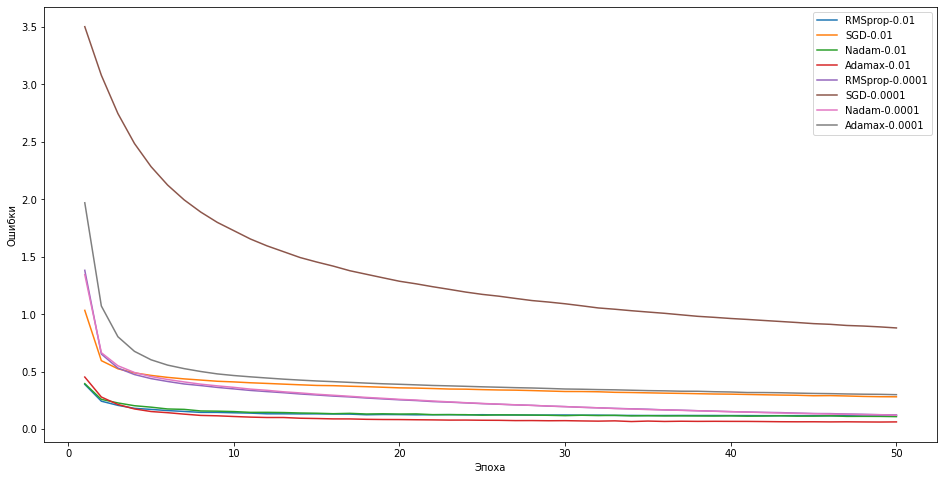

In [5]:
plt.figure(figsize=(16,8))
plt.plot([i for i in range(1, 51)], np.array(learning).T)
plt.ylabel("Ошибки")
plt.xlabel("Эпоха")
plt.legend(["RMSprop-0.01", "SGD-0.01", "Nadam-0.01", "Adamax-0.01",
           "RMSprop-0.0001", "SGD-0.0001", "Nadam-0.0001", "Adamax-0.0001"], loc="upper right")
plt.show()